#### Résolution du challenge "Rocket".

Le but ici est d'étudier et de fournir divers données sur la trajectoire de vol d'une fusée, i.e sa vitesse à un instant donné, etc. 

Pour se faire nous allons, dans un premier temps, étudier les équations de mouvement (1) et (2) de la fusée ainsi que l'équation de variation de la masse de propergol fournies ci-dessus. Ensuite, nous allons utiliser la méthode d'Euler pour calculer et obtenir les divers renseignements recherchés.

##### 1. Etude des équations du mouvement de la fusée.

Commençons par rappeler les équations du mouvement de la fusée. Ces équations sont données par :

\begin{align}
\frac{dh}{dt} &= v\\
(m_s+m_p) \frac{dv}{dt}& = -(m_s+m_p)g + \dot{m}_pv_e - \frac{1}{2}\rho v|v|AC_D
\end{align}

Ces deux équations sont 2 EDO du premier ordre. Appliquons le raisonnement vu tout au long de ce $1^{er}$ module afin de pouvoir appliquer la méthode d'Euler. Pour se faire, commençons par écrire plus succinctement les dérivées par rapport au temps par des primes et faisons passer le terme $(m_s+m_p)$ du côté droit de l'égalité de l'équation (4), nous obtenons :

\begin{align}
h' &= v\\
v' &= -g + \frac{v_e}{m_s+m_p}\dot{m}_p - \frac{\rho v|v|AC_D}{2 (m_s+m_p)}
\end{align}


Avant de poursuivre, notons que nous pouvons représenter ceci sous forme vectorielle comme nous l'avons vu au cours de ce module. Notre système se représente donc comme suit :
$$u'(t) = f(u)$$

où

\begin{align}
u & = \begin{pmatrix} h  \\ v \\\end{pmatrix} & f(u) & = \begin{pmatrix} v \\ \frac{v_e}{m_s+m_p}\dot{m}_p - \frac{\rho v|v|AC_D}{2 (m_s+m_p)} - g  \end{pmatrix}.
\end{align}

Cette forme vectorielle présente l'avantage de représenter clairement ce qui devra être coder et comment ceci devra être fait. En effet, ces vecteurs correspondront tout simplement aux colonnes d'un tableau. En outre, f(u) sera une fonction définie et appelée au cours de la méthode d'Euler.  



Poursuivons la réécriture de notre système en remplaçant chacune des dérivée temporelle par une forme approximée. Nous aurons ainsi, par exemple, pour h' :

\begin{align}
h'(t) \approx \frac{h^{n+1}-h^n}{\Delta t}
\end{align}
où n représente la $n^{e}$ valeur dans l'itération temporelle. Nos deux équations deviennent ainsi :

\begin{align}
\frac{h^{n+1}-h^n}{\Delta t} &= v^n\\
\frac{v^{n+1}-v^n}{\Delta t} &= \frac{v_e}{m_s+m_p}\dot{m}_p - \frac{\rho v^n|v^n|AC_D}{2 (m_s+m_p)} - g
\end{align}


Enfin, dans le but d'évaluer l'état à $t^{n+1}$ (donc pour h par exemple, on veut évaluer l'état $h^{n+1}$), on va évaluer toutes les données de notre système et ce à chaque itération $t^{n}$. Pour cela, il suffit d'isoler l'état n+1 dans chacune de nos équations ce qui nous donne :


\begin{align}
h^{n+1} &= {h^n} + \Delta{t} v^n\\
v^{n+1} &= {v^n} + \Delta{t} (\frac{v_e}{m_s+m_p}\dot{m}_p - \frac{\rho v^n|v^n|AC_D}{2 (m_s+m_p)} - g)
\end{align}

Ce qui nous donne finalement un système de deux EDO discrétisées sur lequel on va pouvoir appliqué la méthode d'Euler.

##### 2. Variation de la quantité de propergol au cours du vol.


D'autre part, la masse de $propergol^1$ évolue tout au long de la trajectoire selon:
\begin{align}
m_p = m_{po} - \int^t_0 \dot{m}_p d\tau
\end{align}


Nous pouvons modifier quelque peu cette dernière équation afin de pouvoir l'utiliser dans notre résolution numérique du problème. En approximant $l'intégrale^{2}$ par une somme pour N très grand, nous avons :

$$\int^t_0 \dot{m}_p d\tau \approx \sum_{n=0}^N (m_p (t_n) - m_p (t_{n-1}))$$

Ainsi, l'équation (3) devient par l'approximation :

\begin{align}
→ m_p = m_{po} - \sum_{n=0}^N (m_p (t_n) - m_p (t_{n-1}))
\end{align}

Il ne reste à présent qu'a déterminer la variation de la masse de propergol, $\dot{m}_p$, tout au long du vol. A partir du  graphique on à immédiatement que :

$$
\dot{m}_p = \left\{ 
\begin{aligned} 
\mbox{20  kg $s^{-1}$ si t} \in \mbox{ [ } 0,5 ] s\\
\mbox{0 kg $s^{-1}$ si t} \in \mbox{]} 5,+ \infty]s
\end{aligned}
\right.
$$

###### [1] Le propergol est un mélange de comburants (des oxydants) et de combustible (des réducteurs) présents séparément avant la combustion. Le propergol, parfois assimilé aux ergols (il s'agit également d'un mélange comburants-combustible), est utilisé comme carburant dans les systèmes propulsifs à réaction comme les fusées.

###### [2] Cette méthode d'approximation a été vue au cours " Calcul Différentiel et Intégrale " présenté par monsieur Joel Fine et Denis Bonheur, dans le cadre d'une première approche de la démonstration du "théorème fondamental de l'analyse".

##### 3. Résolution du problème.

\begin{equation}
\left\{
\begin{aligned}
m_p &= m_{po} - \sum_{n=0}^N (m_p (t_n) - m_p (t_{n-1}))\\
h^{n+1} &= {h^n} + \Delta{t} v\\
v^{n+1} &= {v^n} + \Delta{t} (\frac{v_e}{m_s+m_p}\dot{m}_p -                   \frac{\rho v|v|AC_D}{2 (m_s+m_p)} - g)\\
\end{aligned}
\right.
\end{equation}

In [79]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [80]:
def f(u):
    """Returns the right-hand side of the phugoid system of equations.
    
    Parameters
    ----------
    u : array of float
        array containing the solution at time n.
        
    Returns
    -------
    dudt : array of float
        array containing the RHS given u.
    """
    
    h = u[0]
    v = u[1]
    return numpy.array([v,
                ((v_e*m_p_dot)/(m_s+m_p)) - ((rho*v*abs(v)*A*C_D)/(2*(m_s+m_p)))-g])

In [81]:
def euler_step(u, f, dt):
    """Returns the solution at the next time-step using Euler's method.
    
    Parameters
    ----------
    u : array of float
        solution at the previous time-step.
    f : function
        function to compute the right hand-side of the system of equation.
    dt : float
        time-increment.
    
    Returns
    -------
    u_n_plus_1 : array of float
        approximate solution at the next time step.
    """
    
    return u + dt * f(u)

In [82]:
# Paramètres du modèle:

m_s = 50.0   # poids de la carcasse de la fusée en kg
g  = 9.81    # gravité en m s^{-2}
rho = 1.091  # densité moyenne de l'air en kg m^3
r  = 0.5     # rayon de la section transversale maximale de la fusée
A  = numpy.pi*r**2 # supericie de section transversale maximale de la fusée
v_e = 325.0  # vitesse d'échappement en m s
C_D = 0.15   # coefficient de traînée
m_p0 = 100   # poids initiale (t = 0) de propergol de la fusée

# Conditions initiales:

v0 = 0       # vitesse initiale de la fusée
h0 = 0       # altitude initiale de la fusée

In [83]:
# Discrétisation du temps

T = 50.0
dt = 0.1
N = int(T/dt)+1
t = numpy.linspace(0.0, T, N)


u = numpy.empty((N, 2))      # Initialise le tableau de solution pour chaque dt
u[0] = numpy.array([h0,v0])  # remplit le 1er élément avec les CI


# time loop - Méthode d'Euler
for n in range(N-1): 
    if t[n] < 5 :
        m_p_dot = 20
        m_p_inst= m_p_dot*t[n]
        m_p = m_p0 - m_p_inst
        u[n+1] = euler_step(u[n], f, dt)

    else :
        m_p_dot = 0
        m_p = 0
        u[n+1] = euler_step(u[n], f, dt)

#En prenant u[n+1], on s'assure ainsi de conserver les valeurs ini pour n=0.
#On commence ainsi à u[1] (pour n=0) et on termine à u[N] (n=N-1).
#En prenant donc comme dernier step N-1 on termine bien avec N step

In [84]:
g=u[:,0]
k=u[:,1]

In [85]:
# get the index of element of y where altitude becomes negative

idx_negative_h = numpy.where(u[:,0]<0.0)[0]  # création d'un liste d'indice correspondant aux valeurs négatives de y
if len(idx_negative_h)==0:       # si la liste créer est de longueur nulle alors :
    idx_ground_h = N-1           # Alors l'indice "recherché" correspond au dernier élément de la liste          
else:
    idx_ground_h = idx_negative_h[0]    # dans le cas contraire l'indice recherché correspond au premier élément qui compose notre nouvelle liste





idx_negative_v = numpy.where(u[:,1]<0.0)[0]  # création d'un liste d'indice correspondant aux valeurs négatives de y
if len(idx_negative_v)==0:       # si la liste créer est de longueur nulle alors :
    idx_ground_v = N-1           # Alors l'indice "recherché" correspond au dernier élément de la liste          
else:
    idx_ground_v = idx_negative_v[1]    # dans le cas contraire l'indice recherché correspond au premier élément qui compose notre nouvelle liste


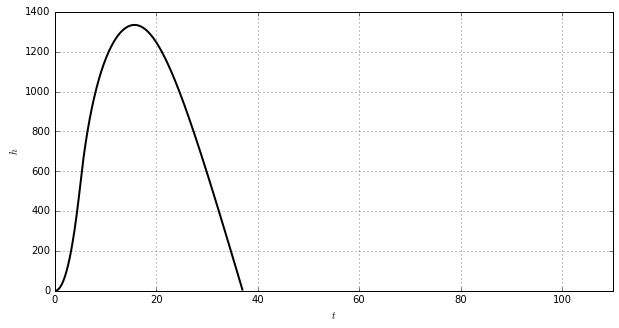

In [86]:
pyplot.figure(figsize=(10,5))
pyplot.grid(True) 
pyplot.xlim(0.0,110) 
pyplot.xlabel('$t$')
pyplot.ylabel('$h$')
pyplot.plot(t[:idx_ground_h],g[:idx_ground_h], color='k', ls='-', lw=2)

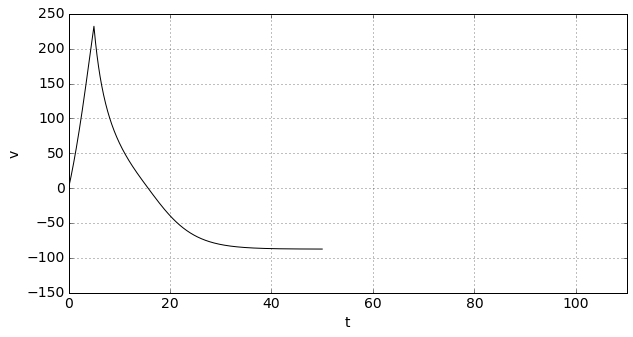

In [87]:
pyplot.figure(figsize=(10,5))   # initialise la taille du plot ("l'échelle d'affichage")
pyplot.xlim(0.0,110) 
pyplot.ylim(-150,250)             # limites du plot de l'axe y
pyplot.tick_params(axis='both', labelsize=14) # règle la taille de la police pour les graduations
pyplot.xlabel('t', fontsize=14) # nom de l'axe x & taille de la police
pyplot.ylabel('v', fontsize=14) # nom de l'axe y & taille de la police
pyplot.plot(t, k, 'k-');
pyplot.grid(True)

In [92]:
#Masse de carburant restant à t= 3,2 s.


for n in range(N-1): 
    if t[n] == 3.2 :
        m_p_dot = 20
        m_p_inst= m_p_dot*t[n]
        m_p = m_p0 - m_p_inst

print(m_p)

36.0


In [89]:
# Vitesse et altitude maximale atteinte en vol. 

h_max = max(g[:idx_ground_h])
v_max = max(k)

print("Altitude maximale atteinte par la fusée :")
print(h_max)
print(v_max)


Altitude maximale atteinte par la fusée :
1334.18294543
232.106133413


In [90]:
# Temps correspond à l'altitude maximale atteinte par la fusée.

hm=0
t_max_h=0
for n in range (N-1):
    if g[n] > hm :
        hm = g[n]
        t_max_h = t[n]
print(hm)
print(t_max_h)

        

1334.18294543
15.7


In [91]:
# Temps correspond à la vitesse maximale.

vm=0
h_vmax=0
for n in range (N-1):
    if k[n] > vm:
        vm = k[n]
        h_vmax = g[n]
        
        t_max = t[n]
        
print(vm)
print(h_vmax)
print(t_max)



232.106133413
523.522834292
5.0


---

###### The cell below loads the style of the notebook.

In [12]:
from IPython.core.display import HTML
css_file = '../styles/numericalmoocstyle.css'
HTML(open(css_file, "r").read())